<a href="https://colab.research.google.com/github/asma-112/model1/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving injury_data_clean.csv to injury_data_clean.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving player_injuries_impact_clean.csv to player_injuries_impact_clean.csv


In [ ]:
df1 = pd.read_csv('injury_data_clean.csv')
df2 = pd.read_csv('player_injuries_impact_clean.csv')

In [ ]:
print("📊 أول 5 صفوف من injury_data_clean.csv:")
print(df1.head(), "\n")

📊 أول 5 صفوف من injury_data_clean.csv:
   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0          24      66.251933     175.732429                  1   
1          37      70.996271     174.581650                  0   
2          32      80.093781     186.329618                  0   
3          28      87.473271     175.504240                  1   
4          25      84.659220     190.175012                  0   

   Training_Intensity  Recovery_Time  Likelihood_of_Injury  
0            0.457929              5                     0  
1            0.226522              6                     1  
2            0.613970              2                     1  
3            0.252858              4                     1  
4            0.577632              1                     1   



In [ ]:
print("📊 أول 5 صفوف من player_injuries_impact_clean.csv:")
print(df2.head(), "\n")

📊 أول 5 صفوف من player_injuries_impact_clean.csv:
               Name  Team Name     Position  Age   Season  FIFA rating  \
0  Jamaal Lascelles  Newcastle  Center Back   26  2019/20           77   
1      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
2      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
3      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
4      Paul Dummett  Newcastle  Center Back   28  2019/20           75   

             Injury Date of Injury Date of return Match1_before_injury_Result  \
0       Knee injury    Nov 9, 2019   Jan 13, 2020                        draw   
1       Knee injury   Oct 20, 2019   Nov 24, 2019                        lose   
2  Hamstring strain    Jan 2, 2020   Jan 17, 2020                        lose   
3   Shoulder injury   Jul 16, 2020   Sep 28, 2020                        lose   
4      Groin injury   Dec 22, 2019   Jan 10, 2020                         win   

   ... Match1_afte

In [ ]:
print("🔍 معلومات عن الأعمدة (injury_data_clean.csv):")
print(df1.info(), "\n")
print("🔍 معلومات عن الأعمدة (player_injuries_impact_clean.csv):")
print(df2.info(), "\n")

🔍 معلومات عن الأعمدة (injury_data_clean.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB
None 

🔍 معلومات عن الأعمدة (player_injuries_impact_clean.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name                                6

In [ ]:
print("❌ القيم المفقودة في injury_data_clean.csv:")
print(df1.isnull().sum(), "\n")

print("❌ القيم المفقودة في player_injuries_impact_clean.csv:")
print(df2.isnull().sum(), "\n")

❌ القيم المفقودة في injury_data_clean.csv:
Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64 

❌ القيم المفقودة في player_injuries_impact_clean.csv:
Name                                  0
Team Name                             0
Position                              0
Age                                   0
Season                                0
FIFA rating                           0
Injury                                0
Date of Injury                        0
Date of return                        0
Match1_before_injury_Result           0
Match1_before_injury_Opposition       0
Match1_before_injury_GD               0
Match1_before_injury_Player_rating    0
Match2_before_injury_Result           0
Match2_before_injury_Opposition       0
Match2_before_injury_GD               0
Match2_before_injury_Player_rating    0
Match3_before_injury_Resul

In [ ]:
print("📈 إحصائيات (injury_data_clean.csv):")
print(df1.describe(), "\n")

print("📈 إحصائيات (player_injuries_impact_clean.csv):")
print(df2.describe(), "\n")

📈 إحصائيات (injury_data_clean.csv):
        Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
count  1000.000000    1000.000000    1000.000000        1000.000000   
mean     28.231000      74.794351     179.750948           0.515000   
std       6.538378       9.892621       9.888921           0.500025   
min      18.000000      40.191912     145.285701           0.000000   
25%      22.000000      67.944028     173.036976           0.000000   
50%      28.000000      75.020569     180.034436           1.000000   
75%      34.000000      81.302956     186.557913           1.000000   
max      39.000000     104.650104     207.308672           1.000000   

       Training_Intensity  Recovery_Time  Likelihood_of_Injury  
count         1000.000000    1000.000000            1000.00000  
mean             0.490538       3.466000               0.50000  
std              0.286184       1.701099               0.50025  
min              0.000031       1.000000               0.00000  

In [ ]:
df = df1.copy("/content/player_injuries_impact_clean.csv")

In [ ]:
X = df.drop('Likelihood_of_Injury', axis=1)
y = df['Likelihood_of_Injury']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("📊 دقة النموذج:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

📊 دقة النموذج: 0.555

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55        95
           1       0.58      0.54      0.56       105

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.56       200



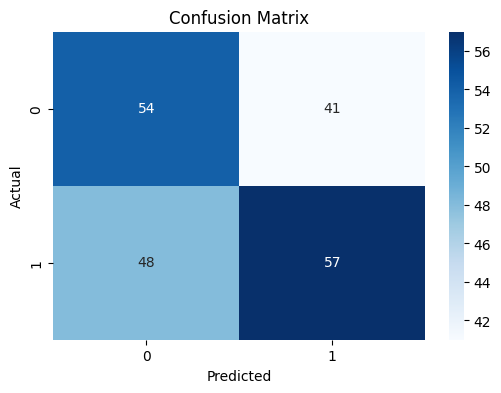

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
os.makedirs('/mnt/data/', exist_ok=True)

In [ ]:
joblib.dump(model, '/mnt/data/player_injury_predictor_model.pkl')
print("✅ تم حفظ النموذج باسم: player_injury_predictor_model.pkl")

✅ تم حفظ النموذج باسم: player_injury_predictor_model.pkl


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("🔍 أول 10 نتائج تنبؤ:")
print(y_pred[:10])

🔍 أول 10 نتائج تنبؤ:
[1 0 1 1 1 1 1 1 1 0]


In [ ]:
print("🎯 القيم الفعلية:")
print(y_test.values[:10])

🎯 القيم الفعلية:
[1 1 0 0 1 1 1 1 1 0]


In [ ]:
new_player = [[25, 75.0, 180.0, 1, 0.6, 3]]

In [ ]:
model = joblib.load('/mnt/data/player_injury_predictor_model.pkl')

In [ ]:
prediction = model.predict(new_player)
if prediction[0] == 1:
    print("⚠️ اللاعب معرض لخطر الإصابة")
else:
    print("✅ اللاعب غير معرض لخطر الإصابة")

✅ اللاعب غير معرض لخطر الإصابة


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
impact_df = pd.read_csv('/content/player_injuries_impact_clean.csv')

In [ ]:
print(impact_df.columns.tolist())

['Name', 'Team Name', 'Position', 'Age', 'Season', 'FIFA rating', 'Injury', 'Date of Injury', 'Date of return', 'Match1_before_injury_Result', 'Match1_before_injury_Opposition', 'Match1_before_injury_GD', 'Match1_before_injury_Player_rating', 'Match2_before_injury_Result', 'Match2_before_injury_Opposition', 'Match2_before_injury_GD', 'Match2_before_injury_Player_rating', 'Match3_before_injury_Result', 'Match3_before_injury_Opposition', 'Match3_before_injury_GD', 'Match3_before_injury_Player_rating', 'Match1_missed_match_Result', 'Match1_missed_match_Opposition', 'Match1_missed_match_GD', 'Match2_missed_match_Result', 'Match2_missed_match_Opposition', 'Match2_missed_match_GD', 'Match3_missed_match_Result', 'Match3_missed_match_Opposition', 'Match3_missed_match_GD', 'Match1_after_injury_Result', 'Match1_after_injury_Opposition', 'Match1_after_injury_GD', 'Match1_after_injury_Player_rating', 'Match2_after_injury_Result', 'Match2_after_injury_Opposition', 'Match2_after_injury_GD', 'Match2_

In [ ]:
def clean_rating(r):
    try:
        return float(str(r).replace('(S)', '').replace('N.A.', '').strip())
    except:
        return None

before_cols = ['Match1_before_injury_Player_rating', 'Match2_before_injury_Player_rating', 'Match3_before_injury_Player_rating']
after_cols = ['Match1_after_injury_Player_rating', 'Match2_after_injury_Player_rating', 'Match3_after_injury_Player_rating']

# Apply the cleaning function to the relevant columns
for col in before_cols:
    impact_df[col] = impact_df[col].apply(clean_rating)

for col in after_cols:
    impact_df[col] = impact_df[col].apply(clean_rating)

# Calculate and add 'Average_Before_Injury' column
impact_df['Average_Before_Injury'] = impact_df[[
    'Match1_before_injury_Player_rating',
    'Match2_before_injury_Player_rating',
    'Match3_before_injury_Player_rating'
]].mean(axis=1)

# Calculate and add 'Average_After_Injury' column
impact_df['Average_After_Injury'] = impact_df[[
    'Match1_after_injury_Player_rating',
    'Match2_after_injury_Player_rating',
    'Match3_after_injury_Player_rating'
]].mean(axis=1)

# Calculate and add 'Performance_Change' column
impact_df['Performance_Change'] = impact_df['Average_After_Injury'] - impact_df['Average_Before_Injury']

# Now you can access these columns:
impact_df[['Name', 'Average_Before_Injury', 'Average_After_Injury', 'Performance_Change']].head()

,Name,Average_Before_Injury,Average_After_Injury,Performance_Change
0,Jamaal Lascelles,6.433333,6.666667,0.233333
1,Fabian Schär,6.466667,NaN,NaN
2,Fabian Schär,6.066667,6.250000,0.183333
3,Fabian Schär,5.933333,NaN,NaN
4,Paul Dummett,6.000000,NaN,NaN


In [ ]:
print(df.columns)

Index(['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
       'Training_Intensity', 'Recovery_Time', 'Likelihood_of_Injury'],
      dtype='object')


In [ ]:
print(impact_df.columns.tolist())

['Name', 'Team Name', 'Position', 'Age', 'Season', 'FIFA rating', 'Injury', 'Date of Injury', 'Date of return', 'Match1_before_injury_Result', 'Match1_before_injury_Opposition', 'Match1_before_injury_GD', 'Match1_before_injury_Player_rating', 'Match2_before_injury_Result', 'Match2_before_injury_Opposition', 'Match2_before_injury_GD', 'Match2_before_injury_Player_rating', 'Match3_before_injury_Result', 'Match3_before_injury_Opposition', 'Match3_before_injury_GD', 'Match3_before_injury_Player_rating', 'Match1_missed_match_Result', 'Match1_missed_match_Opposition', 'Match1_missed_match_GD', 'Match2_missed_match_Result', 'Match2_missed_match_Opposition', 'Match2_missed_match_GD', 'Match3_missed_match_Result', 'Match3_missed_match_Opposition', 'Match3_missed_match_GD', 'Match1_after_injury_Result', 'Match1_after_injury_Opposition', 'Match1_after_injury_GD', 'Match1_after_injury_Player_rating', 'Match2_after_injury_Result', 'Match2_after_injury_Opposition', 'Match2_after_injury_GD', 'Match2_

In [ ]:
# تحديد الأعمدة الخاصة بتقييمات الأداء قبل وبعد الإصابة
before_cols = ['Match1_before_injury_Player_rating', 'Match2_before_injury_Player_rating', 'Match3_before_injury_Player_rating']
after_cols = ['Match1_after_injury_Player_rating', 'Match2_after_injury_Player_rating', 'Match3_after_injury_Player_rating']

# حساب متوسط الأداء قبل الإصابة
impact_df['Avg_Rating_Before'] = impact_df[before_cols].mean(axis=1)

# حساب متوسط الأداء بعد الإصابة
impact_df['Avg_Rating_After'] = impact_df[after_cols].mean(axis=1)

# حساب الفرق بين الأداء قبل وبعد الإصابة
impact_df['Performance_Change'] = impact_df['Avg_Rating_After'] - impact_df['Avg_Rating_Before']

# عرض النتائج الأولية
print(impact_df[['Name', 'Avg_Rating_Before', 'Avg_Rating_After', 'Performance_Change']].head())


               Name  Avg_Rating_Before  Avg_Rating_After  Performance_Change
0  Jamaal Lascelles           6.433333          6.666667            0.233333
1      Fabian Schär           6.466667               NaN                 NaN
2      Fabian Schär           6.066667          6.250000            0.183333
3      Fabian Schär           5.933333               NaN                 NaN
4      Paul Dummett           6.000000               NaN                 NaN


In [ ]:
impact_df['Avg_Rating_After'] = impact_df['Avg_Rating_After'].fillna(0)
impact_df['Performance_Change'] = impact_df['Performance_Change'].fillna(0)

In [ ]:
impact_df.dropna(subset=['Avg_Rating_After', 'Performance_Change'], inplace=True)

In [ ]:
impact_df['Avg_Rating_After'] = impact_df['Avg_Rating_After'].fillna(impact_df['Avg_Rating_After'].mean())
impact_df['Performance_Change'] = impact_df['Performance_Change'].fillna(impact_df['Performance_Change'].mean())


In [ ]:
impact_df['Impact'] = impact_df['Performance_Change'].apply(lambda x: 'Improved' if x > 0 else 'Declined' if x < 0 else 'No Change')
impact_counts = impact_df['Impact'].value_counts()
print(impact_counts)

Impact
Declined     253
Improved     240
No Change    163
Name: count, dtype: int64


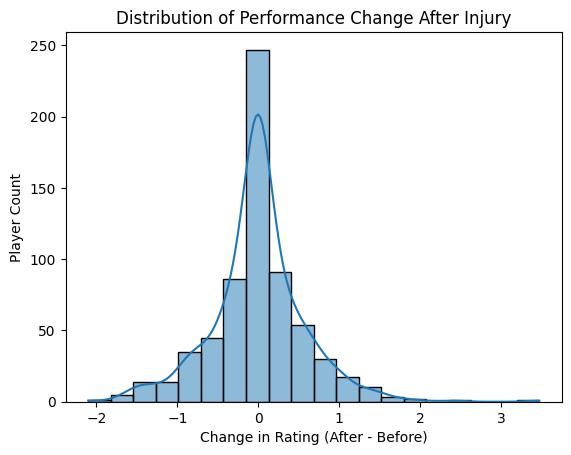

In [ ]:
sns.histplot(impact_df['Performance_Change'].dropna(), bins=20, kde=True) # Changed df to impact_df
plt.title('Distribution of Performance Change After Injury')
plt.xlabel('Change in Rating (After - Before)')
plt.ylabel('Player Count')
plt.show()

In [ ]:
# تحميل البيانات
injury_df = pd.read_csv("injury_data_clean.csv")
impact_df = pd.read_csv("player_injuries_impact_clean.csv")

# تحديد الأعمدة المهمة من ملف impact (مثلاً العمر، المركز، التقييم، الإصابة...)
impact_df_subset = impact_df[['Name', 'Age', 'Position', 'FIFA rating', 'Injury']]

# دمج البيانات باستخدام الاسم كمرجع (تأكد من تطابق الأسماء)
merged_df = pd.merge(injury_df, impact_df_subset, left_index=True, right_index=True)

# تحويل الأعمدة النصية إلى أرقام (مثل المركز Center Back → رقم)
merged_df = pd.get_dummies(merged_df, columns=['Position', 'Injury'])

# فصل الميزات عن الهدف
X = merged_df.drop(['Likelihood_of_Injury', 'Name'], axis=1)
y = merged_df['Likelihood_of_Injury']


In [ ]:
# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء الموديل
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)

# التقييم
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

📊 Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.58      0.49      0.54        77
           1       0.42      0.51      0.46        55

    accuracy                           0.50       132
   macro avg       0.50      0.50      0.50       132
weighted avg       0.52      0.50      0.50       132



In [ ]:
joblib.dump(model, 'injury_prediction_model.pkl')

['injury_prediction_model.pkl']

In [ ]:
risk_threshold = 0.7
predictions_df = pd.DataFrame(model.predict_proba(X)[:, 1], columns=['Injury_Risk'])
predictions_df['Alert'] = predictions_df['Injury_Risk'].apply(lambda x: '⚠️ High Risk' if x > risk_threshold else '✅ Safe')
print(predictions_df.head())

   Injury_Risk         Alert
0         0.24        ✅ Safe
1         0.82  ⚠️ High Risk
2         0.61        ✅ Safe
3         0.86  ⚠️ High Risk
4         0.86  ⚠️ High Risk


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5


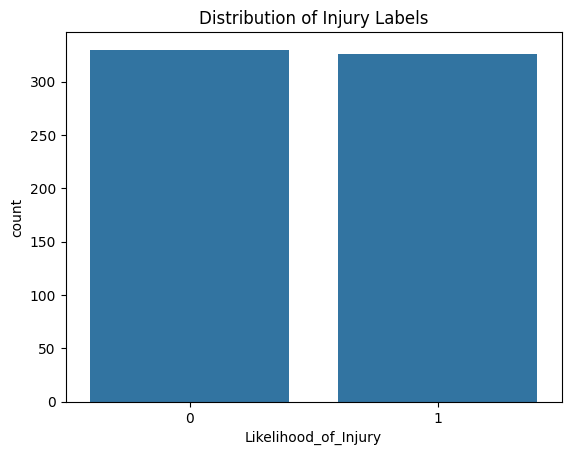

Likelihood_of_Injury
0    330
1    326
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Distribution of Injury Labels')
plt.show()
print(y.value_counts())

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# تحويل البيانات إلى DMatrix (صيغة XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# تحديد المعاملات (Hyperparameters)
params = {
    'objective': 'binary:logistic',  # هدف ثنائي (إصابة أو لا)
    'max_depth': 6,                  # عمق الأشجار
    'eta': 0.1,                      # معدل التعلم
    'eval_metric': 'logloss'         # قياس الخسارة
}

# تدريب النموذج
bst = xgb.train(params, dtrain, num_boost_round=100)

# التنبؤ
y_pred = bst.predict(dtest)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]  # تحويل الاحتمالات إلى 0 أو 1

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (XGBoost): {accuracy}")

Accuracy (XGBoost): 0.5303030303030303


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# تحديد معلمات XGBoost
param_grid = {
    'max_depth': [3, 6, 10],
    'eta': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150],
    'subsample': [0.7, 0.8, 1.0]
}

# تهيئة النموذج XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# تطبيق GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# أفضل المعلمات
print("أفضل المعلمات:", grid_search.best_params_)

# استخدام أفضل المعلمات لتدريب الموديل
best_model = grid_search.best_estimator_

# التنبؤ
y_pred = best_model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"أفضل دقة بعد تحسين المعاملات: {accuracy}")



Fitting 3 folds for each of 81 candidates, totalling 243 fits
أفضل المعلمات: {'eta': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.7}
أفضل دقة بعد تحسين المعاملات: 0.5151515151515151


In [ ]:
# زيادة عدد الأشجار (n_estimators)
from xgboost import XGBClassifier # Import XGBClassifier

param_grid = {
    'eta': [0.1],
    'max_depth': [10],
    'n_estimators': [100, 200],  # زيادة عدد الأشجار
    'subsample': [0.7]
}

# تطبيق GridSearchCV مرة أخرى
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# أفضل المعاملات والدقة
print("أفضل المعاملات:", grid_search.best_params_)
print("أفضل دقة بعد تحسين المعاملات:", grid_search.best_score_)

أفضل المعاملات: {'eta': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}
أفضل دقة بعد تحسين المعاملات: 0.5209852216748768


In [ ]:
# التحقق من الأعمدة المكررة
duplicates = X_train.columns[X_train.columns.duplicated()]
print(duplicates)

Index(['Position_CentralMidfielder_2', 'Position_DefensiveMidfielder_2'], dtype='object')


In [ ]:
# إزالة الأعمدة المكررة
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

In [ ]:
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 271, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 524, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517176 -> initscore=0.068729
[LightGBM] [Info] Start training from score 0.068729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [-1, 10],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]},
             scoring='accuracy')

In [ ]:
# حفظ النموذج الأفضل
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'injury_prediction_model.pkl')


['injury_prediction_model.pkl']

In [ ]:
# توقع الاحتمالات
probs = best_model.predict_proba(X_test)[:, 1]  # احتمال الإصابة

# تحديد اللاعبين المعرضين للإصابة
alert_threshold = 0.8
alerts = X_test[probs >= alert_threshold]
print("عدد التنبيهات:", len(alerts))

عدد التنبيهات: 26


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from joblib import load

In [ ]:
# تحميل النموذج المحفوظ
model = load('injury_prediction_model.pkl')

In [ ]:
st.title("تنبؤ الإصابات في اللاعبين")

2025-04-06 03:10:14.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:10:14.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# رفع البيانات لتنبؤ الإصابات
uploaded_file = st.file_uploader("رفع البيانات", type=["csv", "xlsx"])
if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.write("البيانات المدخلة:", data.head())

    # التنبؤ بالإصابات
    # This block is moved inside the 'if' to ensure data is defined
    predictions = model.predict(data)
    st.write("التنبؤات:", predictions)
else:
    st.write("⚠️ Please upload a CSV or XLSX file.") # Inform the user if no file is uploaded

2025-04-06 03:12:30.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:12:30.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:12:30.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:12:30.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:12:30.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:12:30.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:12:30.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 03:12:30.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
predictions_df.to_csv('predictions_output.csv', index=False)

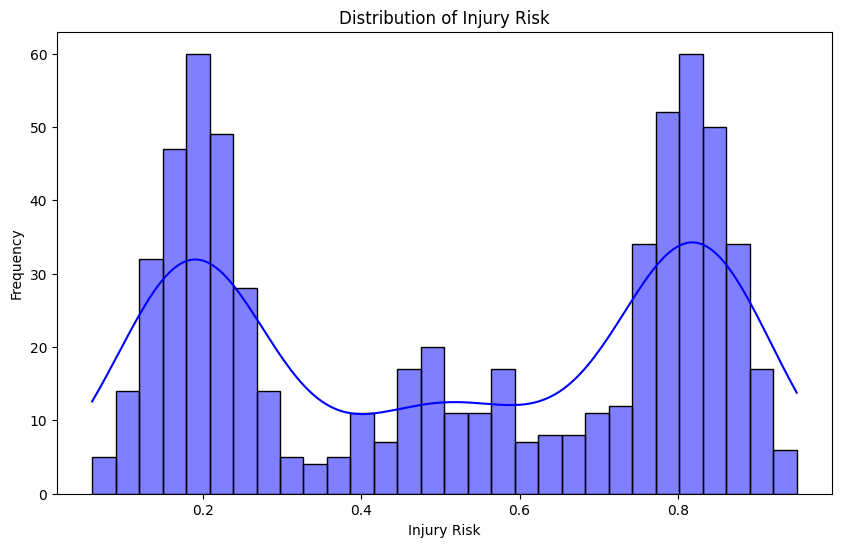

In [ ]:
# رسم التوزيع باستخدام seaborn
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['Injury_Risk'], kde=True, color='blue', bins=30)
plt.title('Distribution of Injury Risk')
plt.xlabel('Injury Risk')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


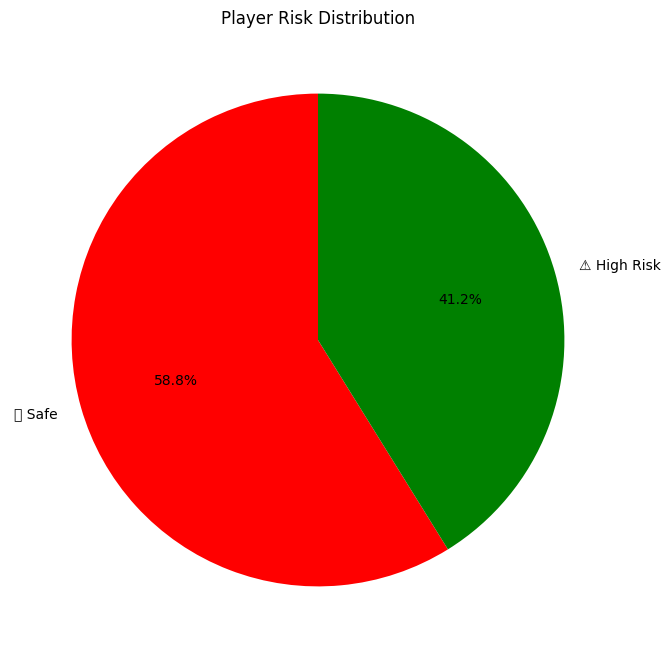

In [ ]:
# حساب عدد اللاعبين في كل فئة
risk_counts = predictions_df['Alert'].value_counts()

# رسم بياني دائري
plt.figure(figsize=(8, 8))
risk_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Player Risk Distribution')
plt.ylabel('')  # إخفاء التسمية
plt.show()


In [ ]:
# قراءة البيانات
injury_data = pd.read_csv('injury_data_clean.csv')
player_injuries_impact = pd.read_csv('player_injuries_impact_clean.csv')

# Assuming 'Player_Age' in injury_data and 'Name' in player_injuries_impact
# represent the player identifier, modify the merge function:
merged_data = pd.merge(injury_data, player_injuries_impact, left_on='Player_Age', right_on='Age', how='inner')
# Replace 'Player_Age' and 'Age' with the correct column names if different

# Check if the merge is successful
print(merged_data.head())

   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0          24      66.251933     175.732429                  1   
1          24      66.251933     175.732429                  1   
2          24      66.251933     175.732429                  1   
3          24      66.251933     175.732429                  1   
4          24      66.251933     175.732429                  1   

   Training_Intensity  Recovery_Time  Likelihood_of_Injury  \
0            0.457929              5                     0   
1            0.457929              5                     0   
2            0.457929              5                     0   
3            0.457929              5                     0   
4            0.457929              5                     0   

                  Name  Team Name            Position  ...  \
0  Allan Saint-Maximin  Newcastle         Left winger  ...   
1  Allan Saint-Maximin  Newcastle         Left winger  ...   
2  Allan Saint-Maximin  Newcastle         Le

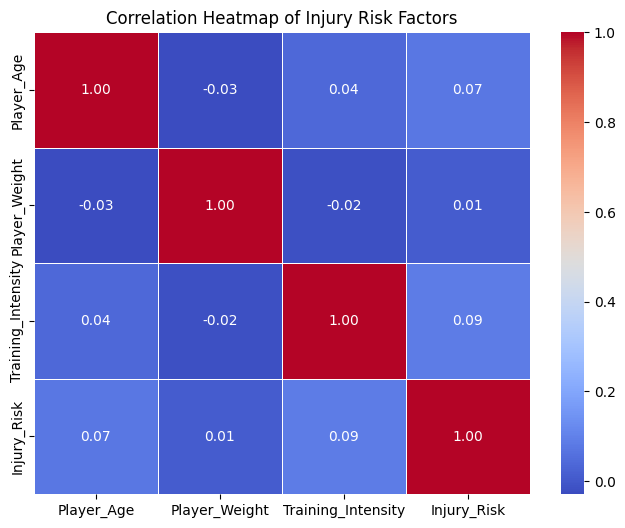

In [ ]:
# رسم خريطة حرارية لبيانات العلاقة بين الأعمار، الوزن، شدة التدريب، ومخاطر الإصابة
correlation_matrix = merged_data[['Player_Age', 'Player_Weight', 'Training_Intensity', 'Injury_Risk']].corr()

# رسم الخريطة الحرارية
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Injury Risk Factors')
plt.show()


In [ ]:
# تعيين قيمة التنبيه بناءً على مستوى الخطر
risk_threshold = 0.7
merged_data['Alert'] = merged_data['Injury_Risk'].apply(lambda x: '⚠️ High Risk' if x > risk_threshold else '✅ Safe')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


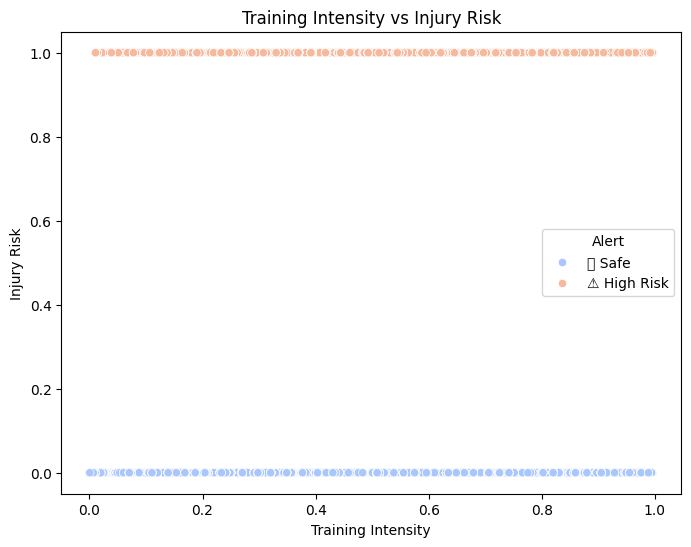

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Training_Intensity', y='Injury_Risk', data=merged_data, hue='Alert', palette='coolwarm')
plt.title('Training Intensity vs Injury Risk')
plt.xlabel('Training Intensity')
plt.ylabel('Injury Risk')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# تأكد من أن لديك البيانات المناسبة في DataFrame
# merged_data يحتوي على البيانات المطلوبة مثل 'Fatigue_Level' و 'Injury_Risk' و 'Alert'

# رسم scatter plot يوضح العلاقة بين مستوى التعب (Fatigue Level) ومخاطر الإصابة (Injury Risk)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fatigue_Level', y='Injury_Risk', data=merged_data, hue='Alert', palette='coolwarm', style='Alert', markers={'⚠️ High Risk': 'X', '✅ Safe': 'o'})
plt.title('Fatigue Level vs Injury Risk with Alerts')
plt.xlabel('Fatigue Level')
plt.ylabel('Injury Risk')
plt.legend(title='Risk Level', loc='upper right')
plt.grid(True)
plt.show()


ValueError: Could not interpret value `Fatigue_Level` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

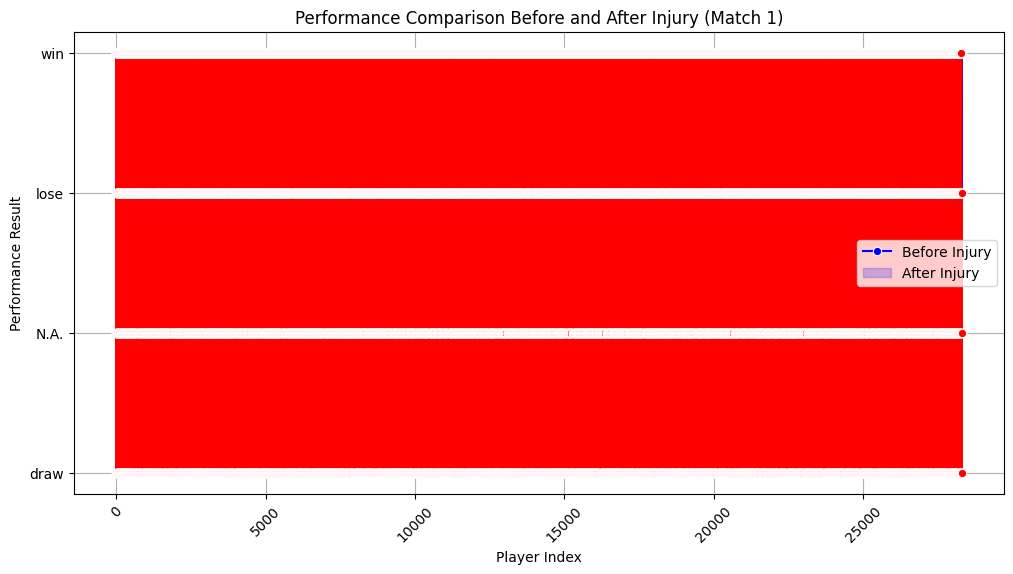

In [ ]:
plt.figure(figsize=(12, 6))

# رسم مقارنة بين الأداء قبل وبعد الإصابة في أول مباراة
sns.lineplot(data=merged_data, x=merged_data.index, y='Match1_before_injury_Result', label='Before Injury', marker='o', color='blue')
sns.lineplot(data=merged_data, x=merged_data.index, y='Match1_after_injury_Result', label='After Injury', marker='o', color='red')

plt.title('Performance Comparison Before and After Injury (Match 1)')
plt.xlabel('Player Index')
plt.ylabel('Performance Result')
plt.legend(labels=['Before Injury', 'After Injury'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


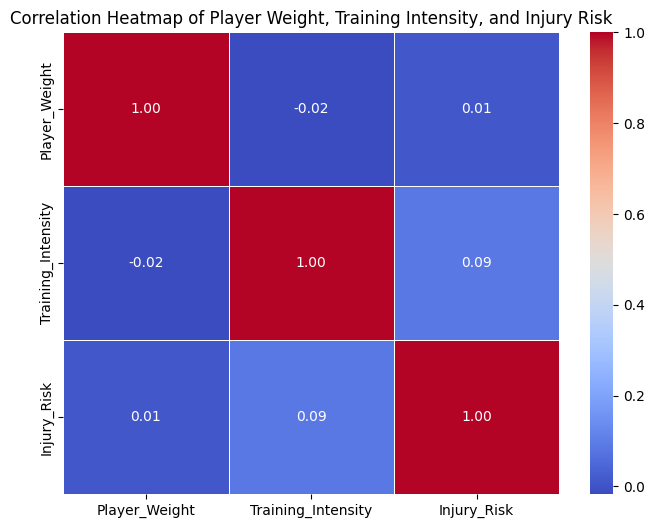

In [ ]:
# إنشاء خريطة حرارية تظهر العلاقة بين "وزن اللاعب" و "شدة التدريب" و "مخاطر الإصابة"
correlation_matrix = merged_data[['Player_Weight', 'Training_Intensity', 'Injury_Risk']].corr()

# رسم الخريطة الحرارية
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Player Weight, Training Intensity, and Injury Risk')
plt.show()


<ipython-input-239-99d95c6eca8c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Training_Intensity', y='Injury_Risk', data=merged_data, palette='Set2')


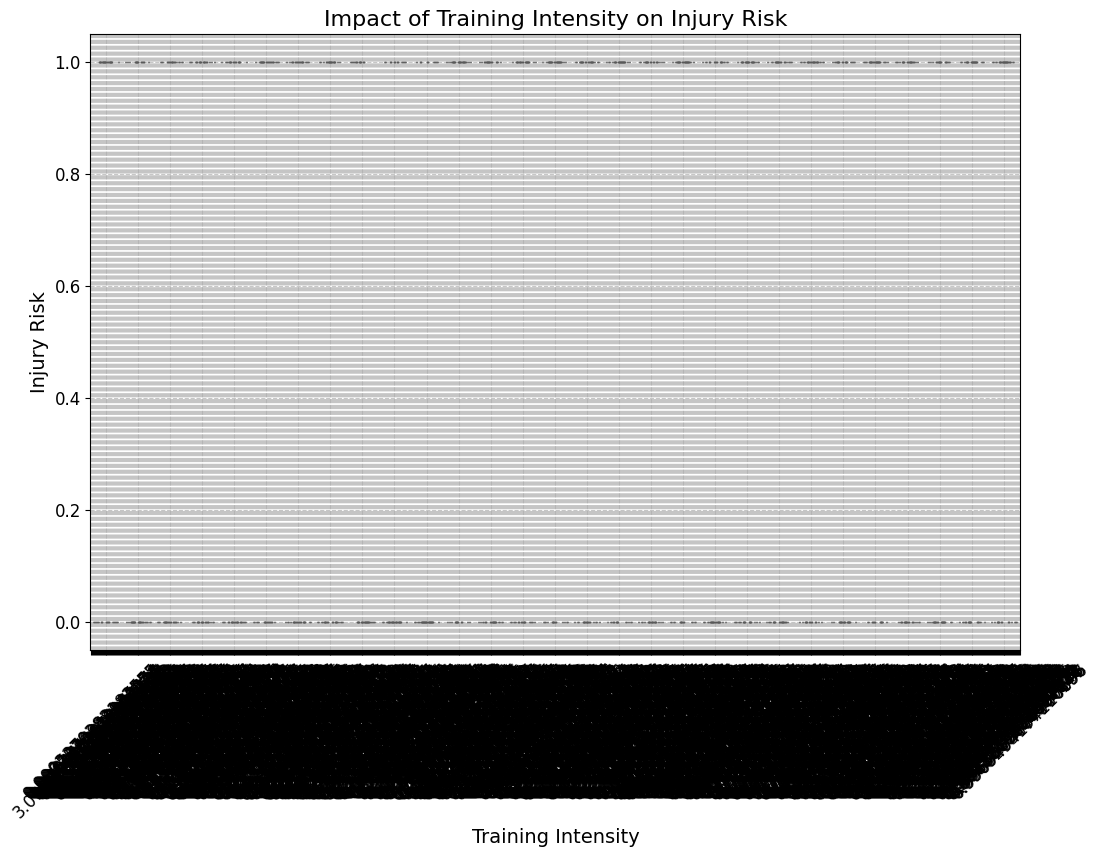

In [ ]:
plt.figure(figsize=(12, 8))

# رسم boxplot يوضح تأثير شدة التدريب على خطر الإصابة
sns.boxplot(x='Training_Intensity', y='Injury_Risk', data=merged_data, palette='Set2')

plt.title('Impact of Training Intensity on Injury Risk', fontsize=16)
plt.xlabel('Training Intensity', fontsize=14)
plt.ylabel('Injury Risk', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


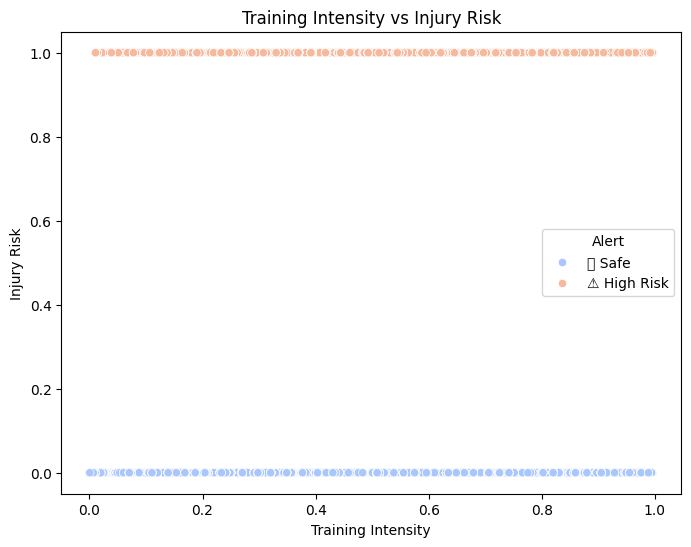

In [ ]:
# رسم Scatterplot بين "شدة التدريب" و "مخاطر الإصابة"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Training_Intensity', y='Injury_Risk', data=merged_data, hue='Alert', palette='coolwarm')
plt.title('Training Intensity vs Injury Risk')
plt.xlabel('Training Intensity')
plt.ylabel('Injury Risk')
plt.show()
